In [1]:
%clear
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pyalps
import pyalps.plot
import matplotlib.pyplot as plt
import numpy as np

import load

In [3]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.colorbar as colorbar
from IPython.display import display, HTML 

In [4]:
def plot_local_measurement(d, matrixel, lims):
    y = matrixel * d.y[0]
    yamax = max(np.abs(lims))
    yamin = min(np.abs(lims))
    
    plt.figure(figsize=(10,2))
    ax = plt.subplot(111)
    
    cm = plt.get_cmap('Oranges_r') if max(y) < 0 else plt.get_cmap('Oranges')
    cNorm  = colors.Normalize(vmin=lims[0], vmax=lims[1])
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    
    ls = lambda v: 4.*(abs(v)-yamin) / yamax + 1
    for i,xi in enumerate(d.x):
        c = scalarMap.to_rgba(y[i])
        plt.plot(xi[:,0], xi[:,1], c=c, linewidth=ls(y[i]))
        
    
    for xx in xrange(int(d.props['L'])):
        for yy in xrange(2):
            plt.scatter(xx,yy,c=(.1,.1,.1), s=50, zorder=10)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', 'datalim')
    ax.axis('off')
    
    cbaxes = plt.axes([0.3, 0.1, 0.4, 0.1])
    cb1 = colorbar.ColorbarBase(cbaxes, cmap=cm,
                                   norm=cNorm,
                                   orientation='horizontal')
    
    plt.suptitle('%s = %s' % (d.props['observable'], sum(y)))
    plt.show()

def plot_density(d):
    L = int(d.props['L'])
    y = np.sum(d.y[0].reshape(L,2), axis=1)
    x = np.arange(len(y))
    
    plt.figure(figsize=(10,3))
    plt.plot(x,y, '-x')
    plt.xlabel('rung i')
    plt.ylabel('Local density')
    plt.grid()
    plt.show()
    
def analyze(data):
    for d in pyalps.flatten(data):
        if d.props['observable'] == 'Energy':
            print 'Energy = ', d.y[0]
        if d.props['observable'] == 'exchange':
            plot_local_measurement(d, d.props['J'], [-0.3, 0])
        if d.props['observable'] == 'hop':
            plot_local_measurement(d, d.props['t'], [0, 0.25])
        if d.props['observable'] == 'Local density':
            plot_density(d)

In [5]:
fname = '/Volumes/alps/phys.ethz.ch/dolfim/LatticeMG/manual_runs/corej/L8M200M200/tevol.out.res.h5'
data = load.loadMAQUISIterations([fname], ['exchange', 'hop', 'Local density'])
data = pyalps.deep_flatten(data)
data.sort(key=lambda d: int(d.props['iteration']))

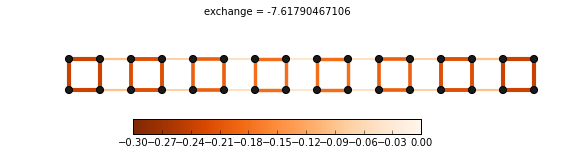

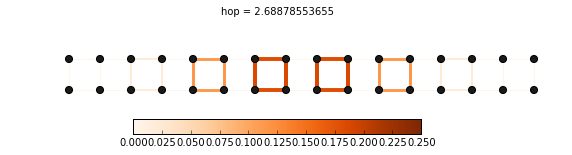

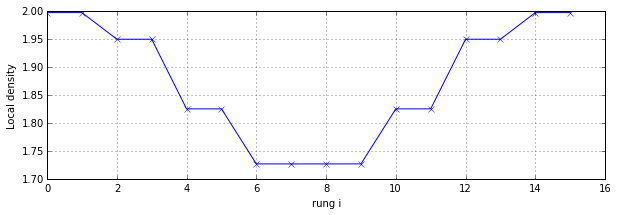

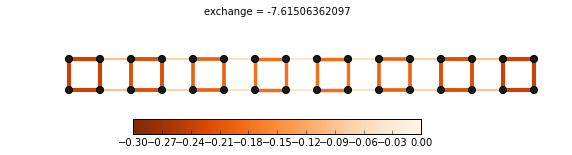

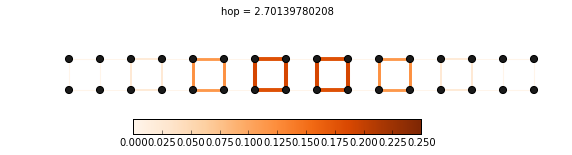

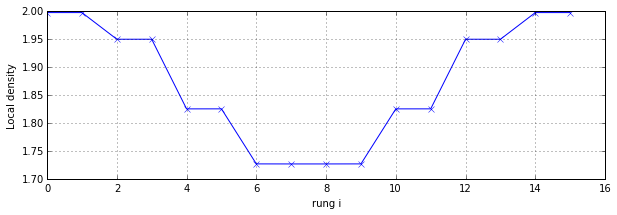

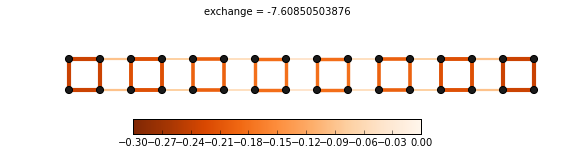

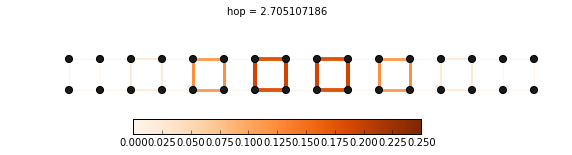

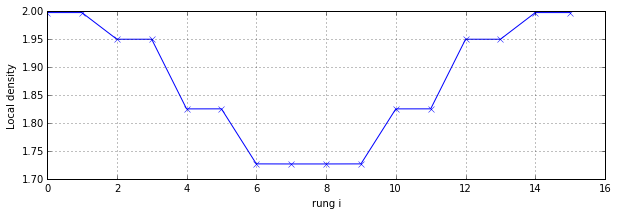

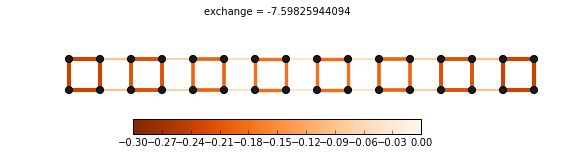

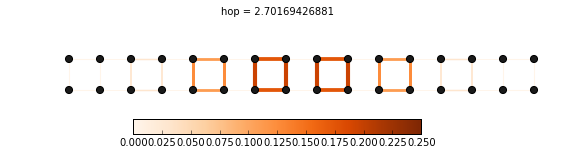

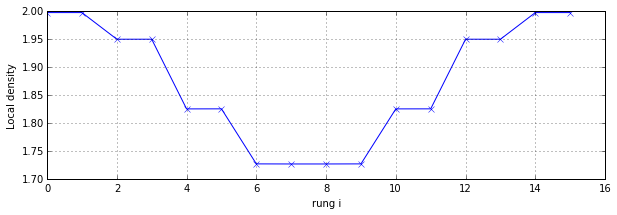

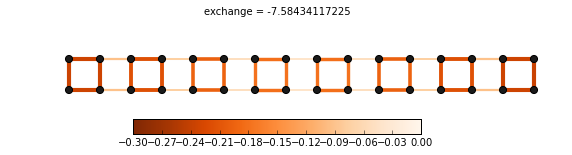

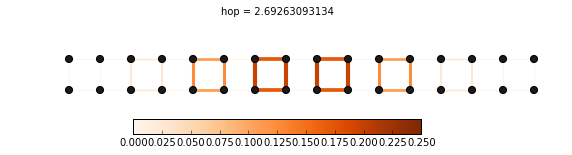

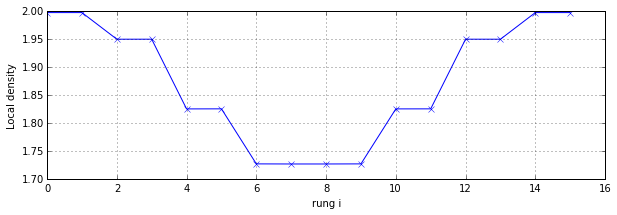

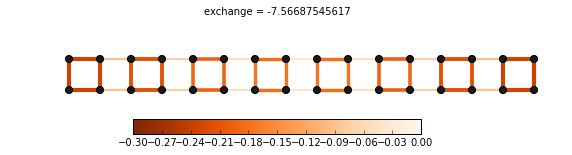

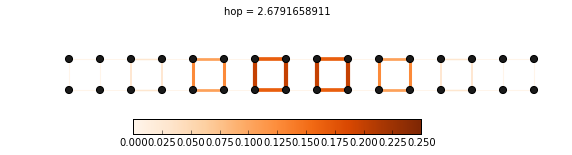

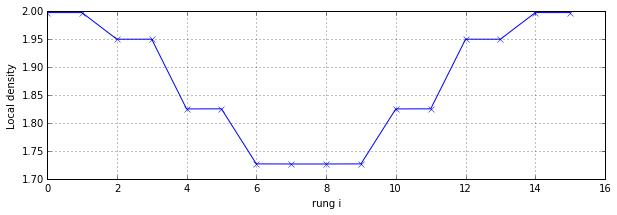

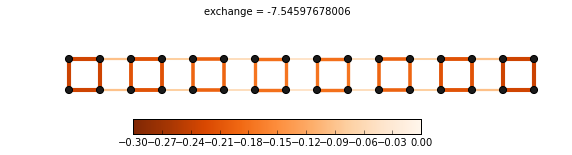

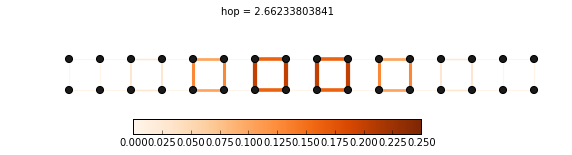

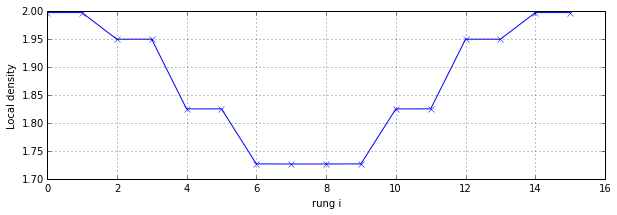

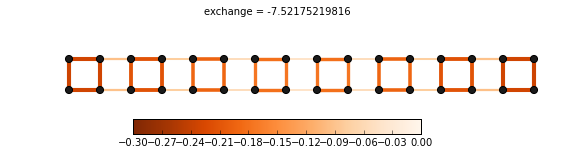

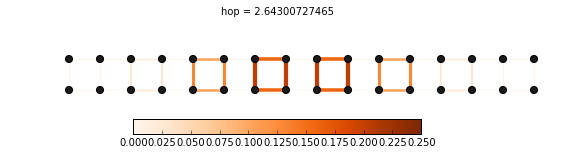

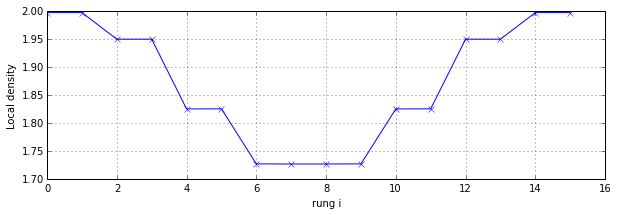

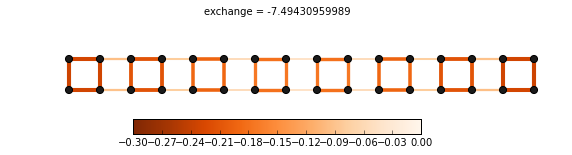

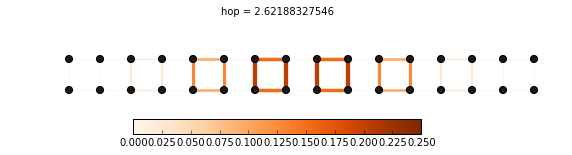

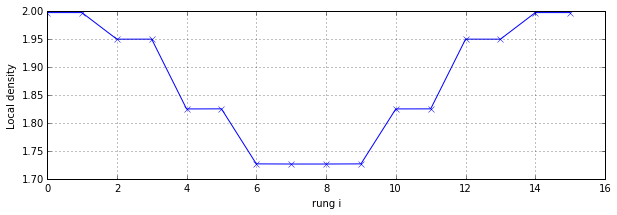

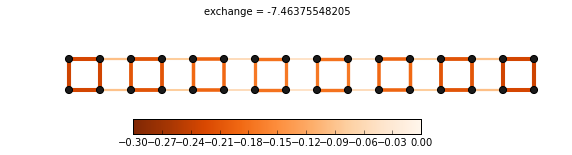

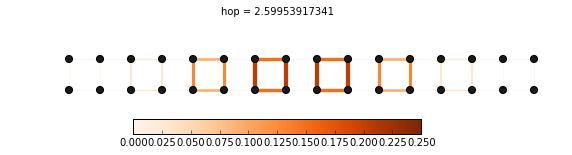

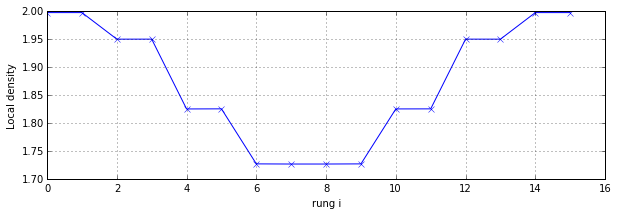

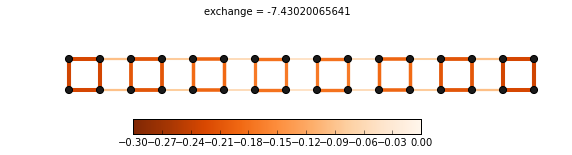

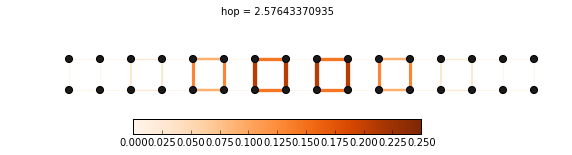

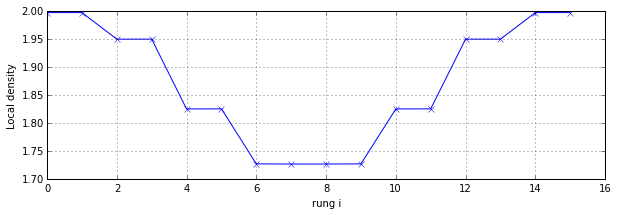

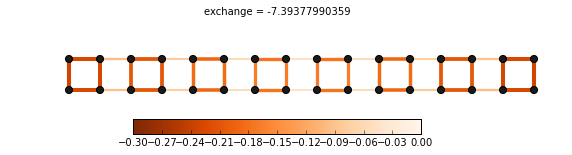

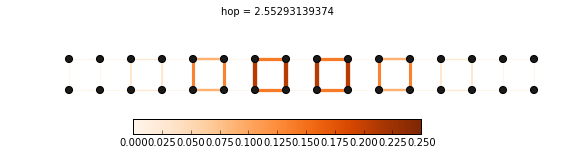

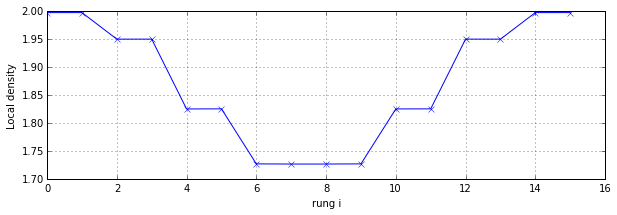

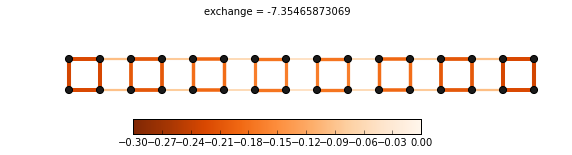

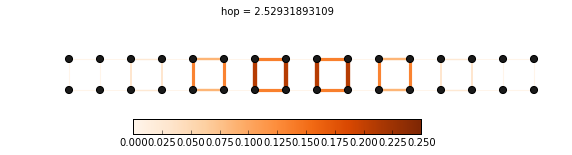

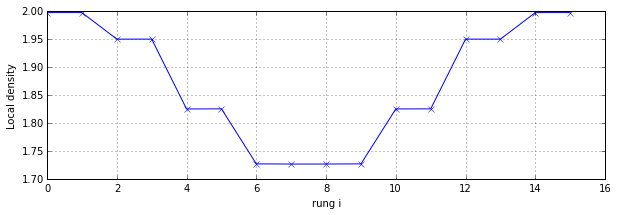

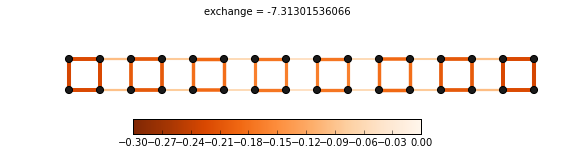

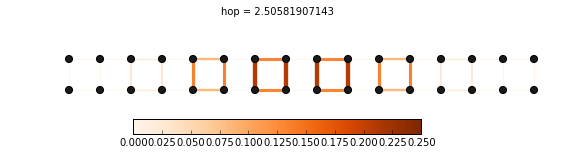

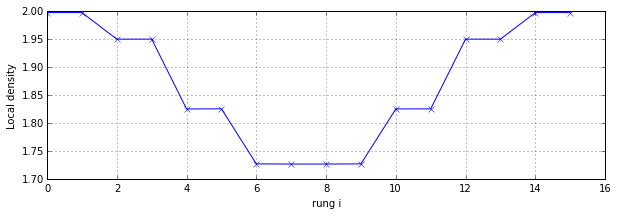

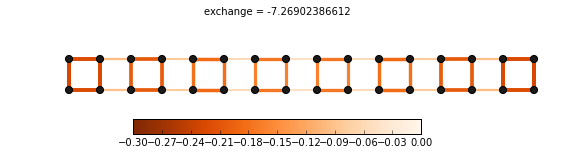

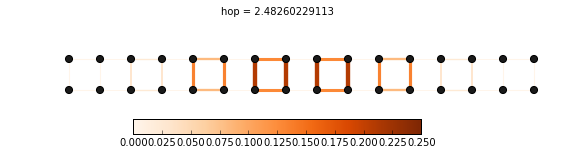

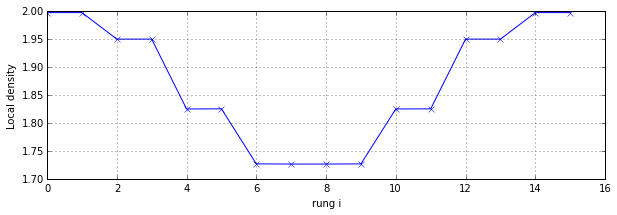

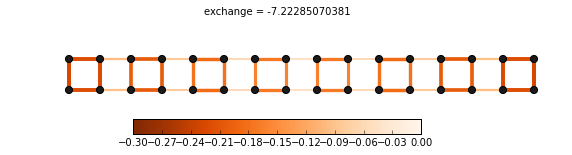

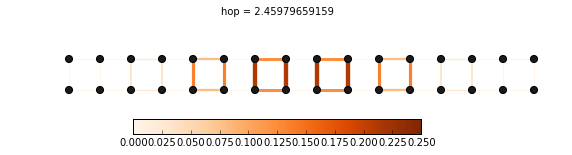

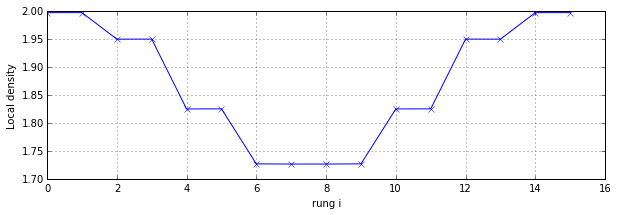

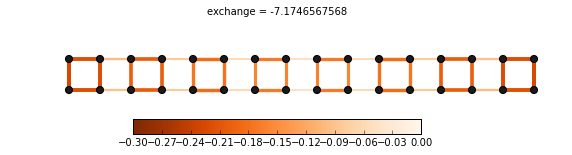

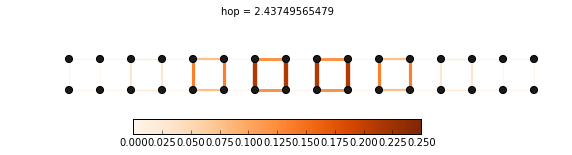

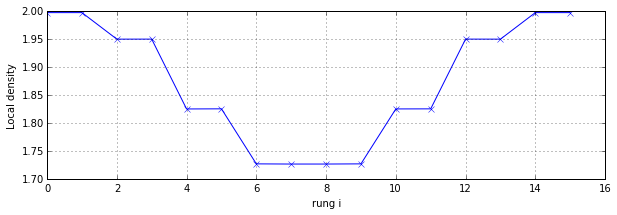

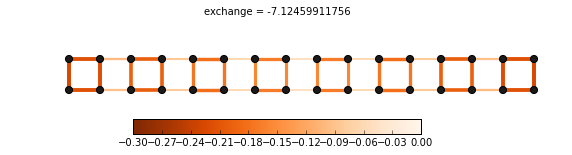

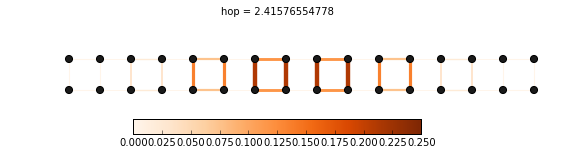

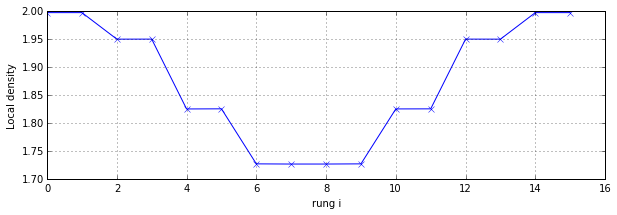

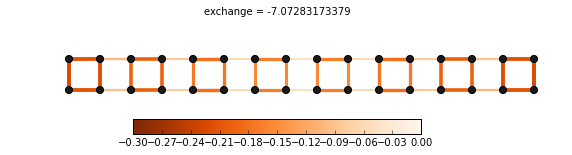

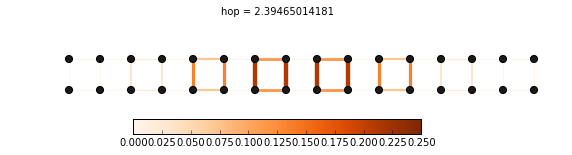

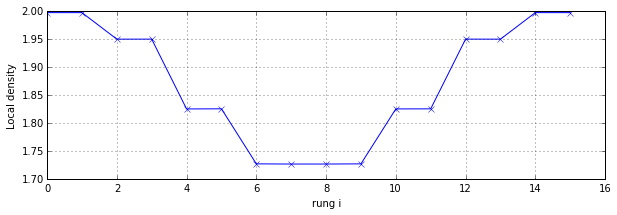

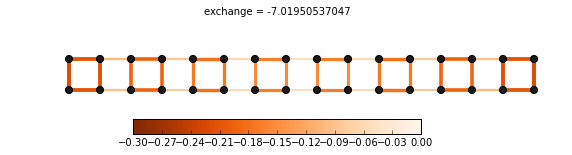

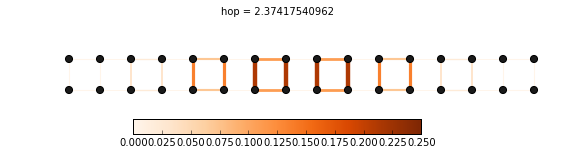

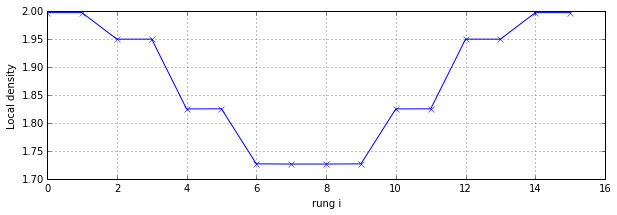

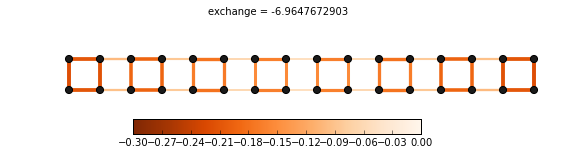

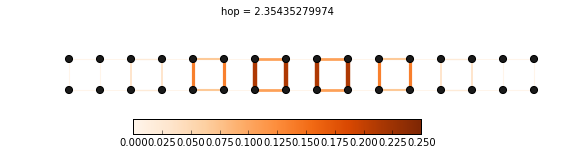

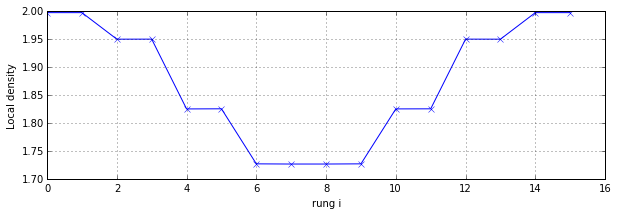

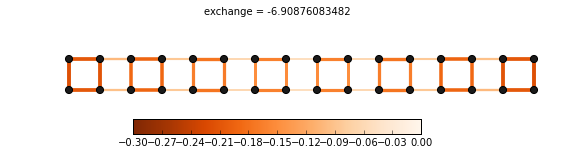

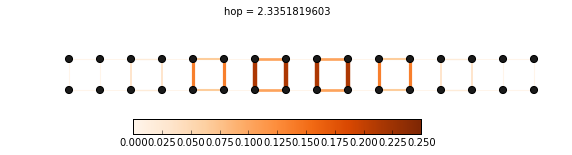

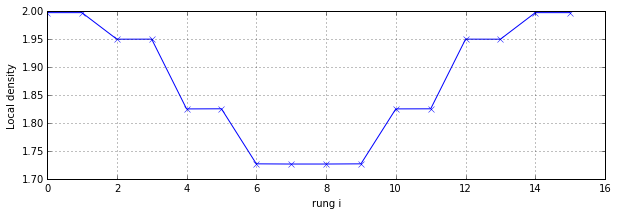

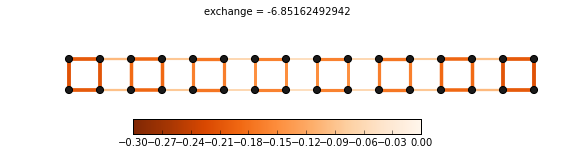

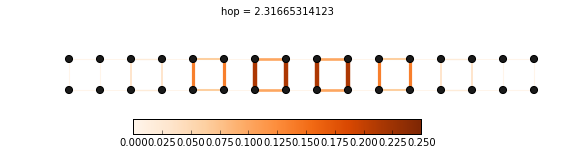

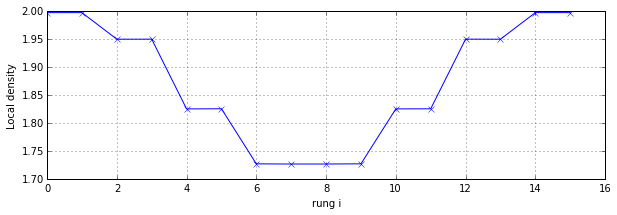

In [7]:
groups = pyalps.groupSets(data, for_each=['iteration'])
for sim in sorted(groups, key=lambda s: int(s[0].props['iteration'])):
    common_props = pyalps.dict_intersect([d.props for d in sim])
    
    display(HTML("<h2>Iteration {}</h2>".format(common_props['iteration']))) 
    analyze(sim)